In [29]:
import process 
import pandas as pd
import numpy as np

# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DATA_Statapp.csv'
# Jerome path : 'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DATA_Statapp.csv'
# Mohamed path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DATA_Statapp.csv'
df = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DATA_Statapp.csv')

# Apply conversion function to 'open' and 'close' columns
df['open'] = df['open'].apply(process.safe_literal_eval)
df['close'] = df['close'].apply(process.safe_literal_eval)

# Calculate returns for each line
df['return'] = df.apply(lambda row: [(close - open) / open for open, close in zip(row['open'], row['close'])], axis=1)

new_df = df[['ticker', 'return']] # create a new data frame with the column ticker and return 

# Créons le DataFrame à partir des listes dans 'return'
# On suppose ici que 'new_df' est déjà défini et contient la colonne 'return'

# Convertir chaque liste dans la colonne 'return' en plusieurs colonnes dans le nouveau DataFrame
returns_df = pd.DataFrame(new_df['return'].tolist())

# Ajouter la colonne 'ticker' du 'new_df' au début de 'returns_df'
returns_df.insert(0, 'ticker', new_df['ticker'])

# Renommer les colonnes pour refléter qu'elles sont des rendements
returns_df.columns = ['ticker'] + [f'return_{i}' for i in range(len(returns_df.columns) - 1)]

df_cleaned = process.remove_rows_with_nan(returns_df)
df_cleaned.reset_index(drop=True, inplace=True)

process.check_nan_inf(df_cleaned)

df_cleaned.set_index('ticker', inplace=True) ## ces deux lignes sont fondamentales, ne pas les retirer !!
df.set_index('ticker', inplace=True)

There are no NaN values in the dataframe


In [39]:
lookback_window = [0, 250]
number_of_clusters = 20
sigma = 15
clustering_method = 'SPONGE' 
number_of_repetition = 30
evaluation_window = 30

overall_return = pd.DataFrame()

for i in range(1, 5):

    consolidated_W = process.consolidated_W(number_of_repetitions=number_of_repetition, lookback_window=lookback_window, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, sigma=sigma, df=df)

    portfolio_return = portfolio_return = process.portfolio_annualized_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, lookback_window=lookback_window, consolidated_W=consolidated_W)

    overall_return = pd.concat([overall_return, portfolio_return])

    lookback_window = [evaluation_window*i, 250 + evaluation_window*i]

    print('*'*i)

/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project

*


/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project

**


/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project

***


/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project

****


In [35]:
overall_return

,portfolio annualized return
return_250,8.050337
return_251,-0.038403
return_252,1.791340
return_253,1.391727
return_254,-0.598496
return_255,-0.238121
return_256,4.967651
return_257,1.821609
return_258,1.310788
return_259,-0.222831


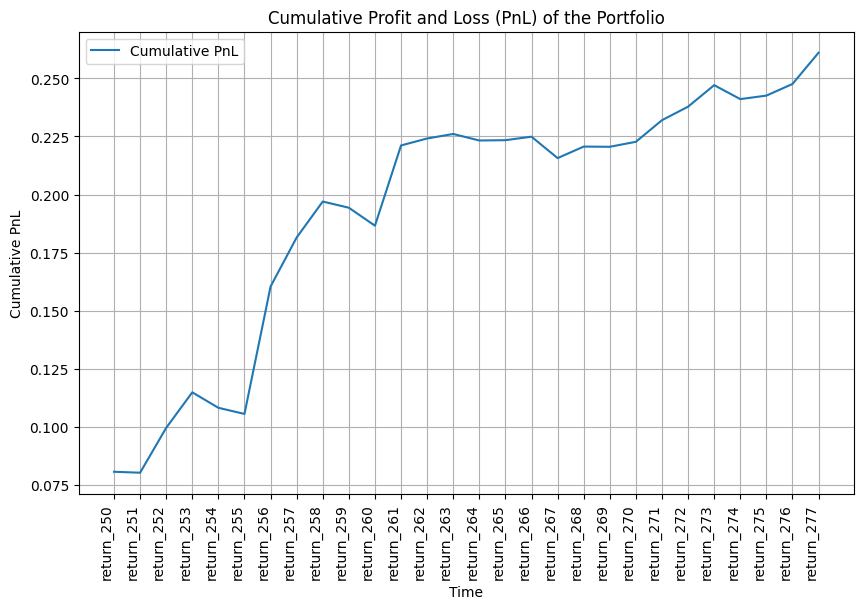

In [36]:
import matplotlib.pyplot as plt 

# Calcul du PnL cumulatif
cumulative_pnl = (1 + overall_return / 100).cumprod() - 1

# Calculate the Sharpe ratio (assuming a risk-free rate of 0 for simplicity)
risk_free_rate = 0.0
sharpe_ratio = (overall_return.mean() - risk_free_rate) / overall_return.std()


# Tracé du PnL cumulatif
plt.figure(figsize=(10, 6))
plt.plot(cumulative_pnl, label='Cumulative PnL')
plt.title('Cumulative Profit and Loss (PnL) of the Portfolio')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.grid(True)

plt.xticks(rotation=90, ha='right')

plt.show()


In [38]:
sharpe_ratio

portfolio annualized return    0.457413
dtype: float64

In [24]:
sharpe_ratio = np.mean(overall_return) / np.std(overall_return)
print(sharpe_ratio)

portfolio annualized return    0.383765
dtype: float64


In [23]:
lookback_window_2 = [305, 555]
number_of_clusters = 20
sigma = 15
clustering_method = 'SPONGE' 
number_of_repetition = 30
evaluation_window = 14

overall_return_2 = pd.DataFrame()

for i in range(1, 5):

    consolidated_W_2 = process.consolidated_W(number_of_repetitions=number_of_repetition, lookback_window=lookback_window_2, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, sigma=sigma, df=df)

    portfolio_return_2 = portfolio_return = process.portfolio_annualized_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, lookback_window=lookback_window_2, consolidated_W=consolidated_W_2)

    overall_return_2 = pd.concat([overall_return_2, portfolio_return_2])

    lookback_window_2 = [evaluation_window*i, 250 + evaluation_window*i]

    print('*'*i)

/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


ValueError: Linearly dependent initial approximations